##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# TensorFlow 2 quickstart for beginners

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/quickstart/beginner"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/quickstart/beginner.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

This tutorial is a [Google Colaboratory](https://colab.research.google.com/notebooks/welcome.ipynb) notebook. Python programs are run directly in the browser—a great way to learn and use TensorFlow. To follow this tutorial, run the notebook in Google Colab by clicking the button at the top of this page.

1. In Colab, connect to a Python runtime: At the top-right of the menu bar, select *CONNECT*.
2. To run all the code in the notebook, select **Runtime** > **Run all**. To run the code cells one at a time, hover over each cell and select the **Run cell** icon.

![Run cell icon](images/beginner/run_cell_icon.png)

## Set up TensorFlow

Import TensorFlow into your program to get started:

In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

ModuleNotFoundError: No module named 'tensorflow'

In [3]:
if tf.config.list_physical_devices('GPU'):
    print("Using GPU for training")
    device = '/GPU:0'
else:
    print("Using CPU for training")
    device = '/CPU:0'

Using GPU for training


If you are following along in your own development environment, rather than [Colab](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb), see the [install guide](https://www.tensorflow.org/install) for setting up TensorFlow for development.

Note: Make sure you have upgraded to the latest `pip` to install the TensorFlow 2 package if you are using your own development environment. See the [install guide](https://www.tensorflow.org/install) for details.

## Load a dataset

Load and prepare the MNIST dataset. The pixel values of the images range from 0 through 255. Scale these values to a range of 0 to 1 by dividing the values by `255.0`. This also converts the sample data from integers to floating-point numbers:

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=360)

In [7]:
x_train[-9]

array([[0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.        , 0.

In [8]:
y_train[-9]

2

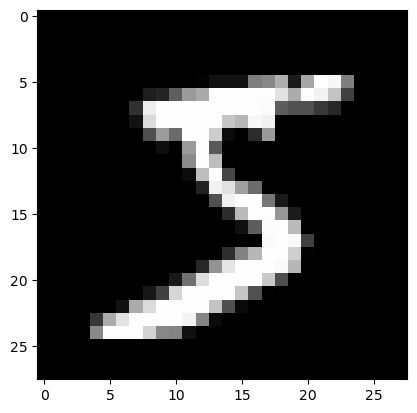

In [9]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')

## Build a machine learning model

Build a `tf.keras.Sequential` model:

In [10]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28), name='input_flatten'),
  tf.keras.layers.Dense(2, activation='relu', name='hidden_layer'),
  # tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.Dense(10, name='output_layer'),
])
model.name = 'baseline_model'

/Users/jeonghyun/miniconda3/envs/env_ktbai/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2025-10-22 08:45:26.536697: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2025-10-22 08:45:26.536744: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-10-22 08:45:26.536747: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-10-22 08:45:26.536914: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-22 08:45:26.536929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (

In [11]:
# 전체 모델의 파라미터 수 확인
model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# show initial weights
print(f"Input Layer:{x_train[0].shape}" )

for layer in model.layers:
    # if weight are trainable weight
    if layer.get_weights():
        weights = layer.get_weights()
        print(f"\nLayer: {layer.name}") 
        print(f"Weight matrix shape: {weights[0].shape}")
        print(f"Bias vector shape: {weights[1].shape}")
        print(f"Total parameters: {weights[0].shape[0]} * {weights[1].shape[0]} + {weights[1].size} = {weights[0].size + weights[1].size}")
        print(f"  - Weights: {weights[0].size}"); 
        print(f"  - Biases: {weights[1].size}")

Input Layer:(28, 28)

Layer: hidden_layer
Weight matrix shape: (784, 2)
Bias vector shape: (2,)
Total parameters: 784 * 2 + 2 = 1570
  - Weights: 1568
  - Biases: 2

Layer: output_layer
Weight matrix shape: (2, 10)
Bias vector shape: (10,)
Total parameters: 2 * 10 + 10 = 30
  - Weights: 20
  - Biases: 10


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) is useful for stacking layers where each layer has one input [tensor](https://www.tensorflow.org/guide/tensor) and one output tensor. Layers are functions with a known mathematical structure that can be reused and have trainable variables. Most TensorFlow models are composed of layers. This model uses the [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense), and [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) layers.

For each example, the model returns a vector of [logits](https://developers.google.com/machine-learning/glossary#logits) or [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) scores, one for each class.

## Feedforward calculation

In [13]:
x_train[:1].shape

(1, 28, 28)

In [14]:
predictions = model(x_train[:1]).numpy()
print(f"predictions: {predictions}")

predictions: [[-0.00303038 -0.01605077  0.04541748  0.0330638   0.01387342  0.00559638  0.03944669 -0.01786461  0.03720516  0.03900973]]


In [15]:
# Hidden layer (2개 뉴런 모두) 계산
input_flat = x_train[0].flatten()  # (784,)
W1 = model.layers[1].get_weights()[0]  # (784, 2)
b1 = model.layers[1].get_weights()[1]  # (2,)

# 행렬 곱셈: input @ weights + bias
hidden_output = np.dot(input_flat, W1) + b1  # (784,) @ (784,2) + (2,) = (2,)
print(f'MM: {input_flat.shape} @ {W1.shape} + {b1.shape} = {hidden_output.shape}')
print("Hidden layer output (before ReLU):", hidden_output)

MM: (784,) @ (784, 2) + (2,) = (2,)
Hidden layer output (before ReLU): [-0.02407219  0.07905066]


In [16]:
# ReLU 활성화 함수 적용: max(0, x)  
hidden_output_relu = np.maximum(0, hidden_output)  # (2,)
print("Hidden layer output (after ReLU):", hidden_output_relu)

Hidden layer output (after ReLU): [0.         0.07905066]


In [17]:
# Output layer (10개 뉴런) 계산
W2 = model.layers[2].get_weights()[0]  # (2, 10)
b2 = model.layers[2].get_weights()[1]  # (10,)

# 행렬 곱셈: hidden @ weights + bias
output_logits = np.dot(hidden_output_relu, W2) + b2  # (2,) @ (2,10) + (10,) = (10,)
print(f'MM: {hidden_output.shape} @ {W2.shape} + {b2.shape} = {output_logits.shape}\n')
print("Output layer(logits):  ", output_logits)
print("model prediction:\t", model(x_train[0:1]).numpy()[0])

MM: (2,) @ (2, 10) + (10,) = (10,)

Output layer(logits):   [-0.00303038 -0.01605077  0.04541747  0.03306379  0.01387342  0.00559638  0.03944668 -0.01786461  0.03720515  0.03900972]
model prediction:	 [-0.00303038 -0.01605077  0.04541748  0.0330638   0.01387342  0.00559638  0.03944669 -0.01786461  0.03720516  0.03900973]


In [55]:
tf.nn.softmax(output_logits)

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([0.09792565, 0.09665888, 0.10278674, 0.10152476, 0.09959503, 0.09877408, 0.10217485, 0.09648372, 0.10194608, 0.10213021])>

## Loss calculation : Crossentropy

Note: It is possible to bake the `tf.nn.softmax` function into the activation function for the last layer of the network. While this can make the model output more directly interpretable, this approach is discouraged as it's impossible to provide an exact and numerically stable loss calculation for all models when using a softmax output. 

Define a loss function for training using `losses.SparseCategoricalCrossentropy`:

In [18]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

The loss function takes a vector of ground truth values and a vector of logits and returns a scalar loss for each example. This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to `-tf.math.log(1/10) ~= 2.3`.

In [19]:
loss_fn(y_train[-1:], predictions).numpy()

2.2833111

## Model compile

Before you start training, configure and compile the model using Keras `Model.compile`. Set the [`optimizer`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) class to `adam`, set the `loss` to the `loss_fn` function you defined earlier, and specify a metric to be evaluated for the model by setting the `metrics` parameter to `accuracy`.

In [20]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

Use the `Model.fit` method to adjust your model parameters and minimize the loss: 

In [21]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


2025-10-22 08:45:27.566336: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.4578 - loss: 1.4899 - val_accuracy: 0.6132 - val_loss: 1.1916
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6252 - loss: 1.1599 - val_accuracy: 0.6242 - val_loss: 1.1086
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6137 - loss: 1.1325 - val_accuracy: 0.6214 - val_loss: 1.0928
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6165 - loss: 1.1181 - val_accuracy: 0.6376 - val_loss: 1.0822
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6335 - loss: 1.1041 - val_accuracy: 0.6539 - val_loss: 1.0624


The `Model.evaluate` method checks the model's performance, usually on a [validation set](https://developers.google.com/machine-learning/glossary#validation-set) or [test set](https://developers.google.com/machine-learning/glossary#test-set).

In [22]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - 4ms/step - accuracy: 0.6371 - loss: 1.1023


[1.1023074388504028, 0.6370999813079834]

The image classifier is now trained to ~98% accuracy on this dataset. To learn more, read the [TensorFlow tutorials](https://www.tensorflow.org/tutorials/).

If you want your model to return a probability, you can wrap the trained model, and attach the softmax to it:

In [24]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [25]:
probability_model(x_test[:1]).numpy()

array([[0.02272334, 0.34173968, 0.01200508, 0.01560263, 0.1441763 , 0.06262619, 0.02644327, 0.07269066, 0.17967872, 0.12231416]], dtype=float32)

In [26]:
# 동일 입력
x_sample = x_test[:1]

# Method 1: model → softmax
out1 = model(x_sample)
prob_manual = tf.nn.softmax(out1).numpy()

# Method 2: probability_model (model + softmax)
prob_auto = probability_model(x_sample).numpy()

print("수동 softmax 결과:", prob_manual)
print("probability_model 결과:", prob_auto)
print("\n비교", np.allclose(prob_manual, prob_auto))
print("최대 차이:", np.abs(prob_manual - prob_auto).max())

# # 다르면, probability_model 재생성
# if not np.allclose(prob_manual, prob_auto):
#     print("\n 다른결과")
#     probability_model_new = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
#     prob_new = probability_model_new(x_sample).numpy()
#     print("재생성 후 결과:", prob_new)
#     print("이제 같은가?", np.allclose(prob_manual, prob_new))
# else:
#     print("\n같은 결과")

수동 softmax 결과: [[0.02272334 0.34173968 0.01200508 0.01560263 0.1441763  0.06262619 0.02644327 0.07269066 0.17967872 0.12231416]]
probability_model 결과: [[0.02272334 0.34173968 0.01200508 0.01560263 0.1441763  0.06262619 0.02644327 0.07269066 0.17967872 0.12231416]]

두 결과가 같은가? True
최대 차이: 0.0

같은 결과


In [27]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[2.27233395e-02, 3.41739684e-01, 1.20050767e-02, 1.56026324e-02, 1.44176304e-01, 6.26261905e-02, 2.64432728e-02, 7.26906583e-02, 1.79678723e-01, 1.22314163e-01],
       [6.96014240e-06, 1.07365937e-04, 9.90730941e-01, 9.12939850e-03, 2.68300871e-13, 8.04463411e-07, 1.24725602e-05, 7.35931010e-13, 1.20517079e-05, 4.65352366e-13],
       [4.43946710e-03, 6.06356442e-01, 5.25914244e-02, 9.13748983e-03, 6.47256449e-02, 1.12550724e-02, 1.57322064e-01, 1.04517341e-02, 5.85102849e-02, 2.52103694e-02],
       [3.42655092e-01, 1.66362652e-03, 1.39612181e-03, 2.15438738e-01, 5.72051067e-06, 2.47252092e-01, 1.92158427e-06, 4.42645018e-04, 1.91023543e-01, 1.20468634e-04],
       [2.27233395e-02, 3.41739684e-01, 1.20050767e-02, 1.56026324e-02, 1.44176304e-01, 6.26261905e-02, 2.64432728e-02, 7.26906583e-02, 1.79678723e-01, 1.22314163e-01]], dtype=float32)>

## Conclusion

Congratulations! You have trained a machine learning model using a prebuilt dataset using the [Keras](https://www.tensorflow.org/guide/keras/overview) API.

For more examples of using Keras, check out the [tutorials](https://www.tensorflow.org/tutorials/keras/). To learn more about building models with Keras, read the [guides](https://www.tensorflow.org/guide/keras). If you want learn more about loading and preparing data, see the tutorials on [image data loading](https://www.tensorflow.org/tutorials/load_data/images) or [CSV data loading](https://www.tensorflow.org/tutorials/load_data/csv).


In [28]:
# evaluation

pred_1 = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


## Classification Evaluation

In [29]:
def evaluate_model(model, x_test, y_test, model_name="Model"):
    """
    분류 모델의 성능을 평가하고 시각화하는 함수
    
    Parameters:
    -----------
    model : keras.Model
        평가할 모델
    x_test : np.ndarray
        테스트 데이터
    y_test : np.ndarray
        테스트 레이블
    model_name : str
        모델 이름 (출력에 사용)
    
    Returns:
    --------
    dict : 평가 지표들 (accuracy, precision, recall, f1_score)
    """
    from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # 예측
    y_pred = model.predict(x_test).argmax(axis=1)
    
    print(f"\n{'='*60}")
    print(f"{model_name} Evaluation Results")
    print(f"{'='*60}\n")
    
    # 1. Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=range(10), yticklabels=range(10))
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    
    # 2. Classification Report (per-class)
    print("\nPer-Class Metrics:")
    print("-" * 60)
    report = classification_report(y_test, y_pred, 
                                   target_names=[f'Digit {i}' for i in range(10)])
    print(report)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model 1 Evaluation Results



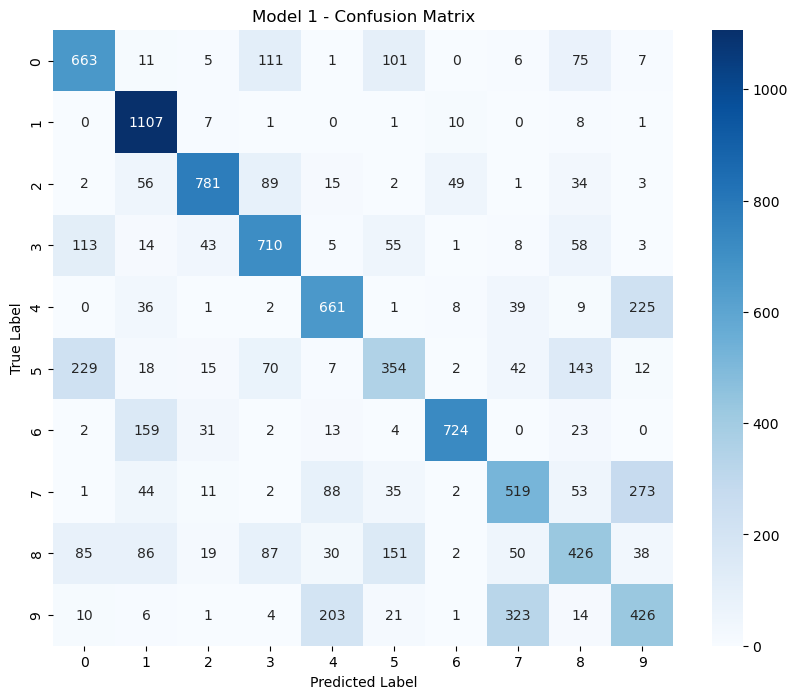


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.60      0.68      0.64       980
     Digit 1       0.72      0.98      0.83      1135
     Digit 2       0.85      0.76      0.80      1032
     Digit 3       0.66      0.70      0.68      1010
     Digit 4       0.65      0.67      0.66       982
     Digit 5       0.49      0.40      0.44       892
     Digit 6       0.91      0.76      0.82       958
     Digit 7       0.53      0.50      0.51      1028
     Digit 8       0.51      0.44      0.47       974
     Digit 9       0.43      0.42      0.43      1009

    accuracy                           0.64     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.64      0.64      0.63     10000



In [30]:
# Model 1 평가
results_model1 = evaluate_model(model, x_test, y_test, model_name="Model 1")

In [31]:
# Model 2 
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/Users/jeonghyun/miniconda3/envs/env_ktbai/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [32]:
model2.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [33]:
history2 = model2.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8722 - loss: 0.4359 - val_accuracy: 0.9164 - val_loss: 0.2957
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8907 - loss: 0.3946 - val_accuracy: 0.9203 - val_loss: 0.3008
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8871 - loss: 0.4155 - val_accuracy: 0.9213 - val_loss: 0.2930
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8841 - loss: 0.4254 - val_accuracy: 0.9183 - val_loss: 0.3057
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8845 - loss: 0.4248 - val_accuracy: 0.9195 - val_loss: 0.2980
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8834 - loss: 0.4221 - val_accuracy: 0.9112 - val_loss: 0.3220
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8803 - loss: 0.4328 - val_accuracy: 0.9126 - val_loss: 0.3172
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8805 - loss: 0

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Model 2 Evaluation Results



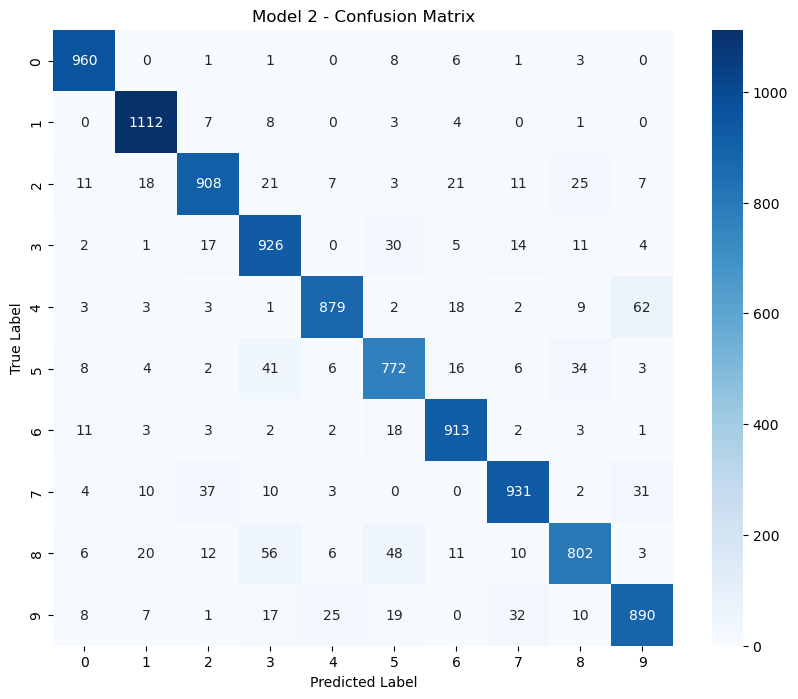


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.95      0.98      0.96       980
     Digit 1       0.94      0.98      0.96      1135
     Digit 2       0.92      0.88      0.90      1032
     Digit 3       0.86      0.92      0.88      1010
     Digit 4       0.95      0.90      0.92       982
     Digit 5       0.85      0.87      0.86       892
     Digit 6       0.92      0.95      0.94       958
     Digit 7       0.92      0.91      0.91      1028
     Digit 8       0.89      0.82      0.86       974
     Digit 9       0.89      0.88      0.89      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [34]:
results_model2 = evaluate_model(model2, x_test, y_test, model_name="Model 2")

In [35]:
# model 3 CNN
model3 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

/Users/jeonghyun/miniconda3/envs/env_ktbai/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model3.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [37]:
model3.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
history3 = model3.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9472 - loss: 0.1690 - val_accuracy: 0.9790 - val_loss: 0.0707
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9803 - loss: 0.0642 - val_accuracy: 0.9800 - val_loss: 0.0651
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9847 - loss: 0.0512 - val_accuracy: 0.9851 - val_loss: 0.0631
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9850 - loss: 0.0549 - val_accuracy: 0.9833 - val_loss: 0.0794
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9853 - loss: 0.0776 - val_accuracy: 0.9722 - val_loss: 0.2344
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.9852 - loss: 0.1093 - val_accuracy: 0.9823 - val_loss: 0.2058
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.9851 - loss: 0.1739 - val_accuracy: 0.9859 - val_loss: 0.2475
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9847 -

In [39]:
x_train[0].shape

(28, 28)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Model 3 CNN Evaluation Results



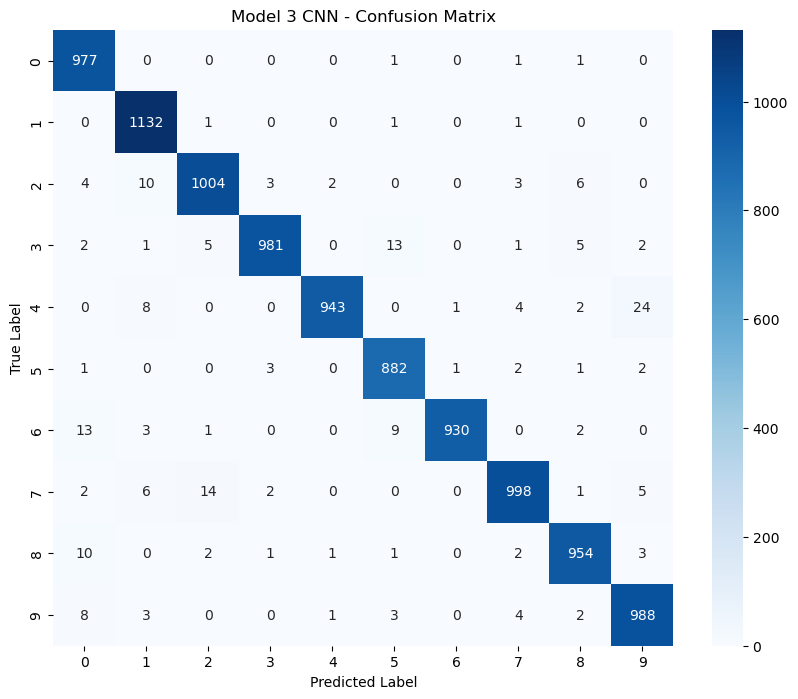


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.96      1.00      0.98       980
     Digit 1       0.97      1.00      0.99      1135
     Digit 2       0.98      0.97      0.98      1032
     Digit 3       0.99      0.97      0.98      1010
     Digit 4       1.00      0.96      0.98       982
     Digit 5       0.97      0.99      0.98       892
     Digit 6       1.00      0.97      0.98       958
     Digit 7       0.98      0.97      0.98      1028
     Digit 8       0.98      0.98      0.98       974
     Digit 9       0.96      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [40]:
evaluate_model(model3, x_test, y_test, model_name="Model 3 CNN")

In [41]:
# model 4 CNN with dropout
model4 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

/Users/jeonghyun/miniconda3/envs/env_ktbai/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model4.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_1 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [43]:
model4.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [44]:
model4.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9218 - loss: 0.2583 - val_accuracy: 0.9758 - val_loss: 0.0862
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9630 - loss: 0.1505 - val_accuracy: 0.9808 - val_loss: 0.0788
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.9689 - loss: 0.1561 - val_accuracy: 0.9791 - val_loss: 0.1110
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 29ms/step - accuracy: 0.9714 - loss: 0.1858 - val_accuracy: 0.9832 - val_loss: 0.1197
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.9707 - loss: 0.2378 - val_accuracy: 0.9811 - val_loss: 0.1927
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 50s 33ms/step - accuracy: 0.9713 - loss: 0.3215 - val_accuracy: 0.9800 - val_loss: 0.2712
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 51s 34ms/step - accuracy: 0.9718 - loss: 0.4176 - val_accuracy: 0.9821 - val_loss: 0.3643
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.9731 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

Model 4 CNN with Dropout Evaluation Results



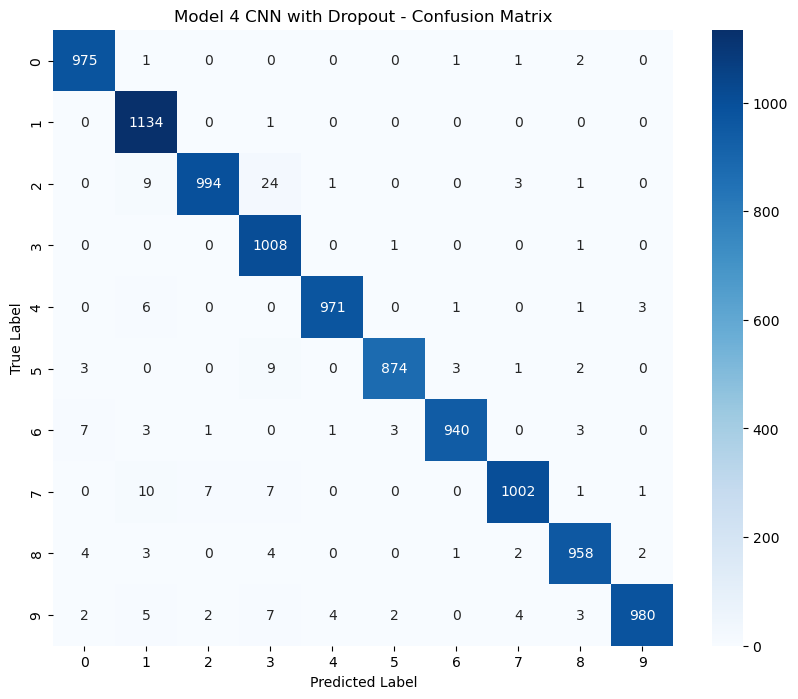


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.98      0.99      0.99       980
     Digit 1       0.97      1.00      0.98      1135
     Digit 2       0.99      0.96      0.98      1032
     Digit 3       0.95      1.00      0.97      1010
     Digit 4       0.99      0.99      0.99       982
     Digit 5       0.99      0.98      0.99       892
     Digit 6       0.99      0.98      0.99       958
     Digit 7       0.99      0.97      0.98      1028
     Digit 8       0.99      0.98      0.98       974
     Digit 9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [45]:
evaluate_model(model4, x_test, y_test, model_name="Model 4 CNN with Dropout")

In [46]:
# batch normalization
model5 = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10)
])

/Users/jeonghyun/miniconda3/envs/env_ktbai/lib/python3.10/site-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model5.compile(optimizer='adam',
                loss=loss_fn,
                metrics=['accuracy'])

In [48]:
model5.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape_2 (Reshape)             │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,250 (477.54 KB)

 Non-trainable params: 320 (1.25 KB)

In [49]:
# Conv2D(32, (3, 3)) with input channels=1
kernel_params = 3 * 3 * 1 * 32  # (height × width × input_ch × output_ch)
bias_params = 32                # 각 필터마다 bias 1개
total = kernel_params + bias_params
total

320

In [50]:
# Conv2D(64, (3, 3)) with input channels=32
kernel_params = 3 * 3 * 32 * 64
bias_params = 64
total = kernel_params + bias_params
total

18496

In [51]:
# 채널 수 × 4 (gamma, beta, moving_mean, moving_variance)
batch_norm_1 = 32 * 4
batch_norm_2 = 64 * 4
batch_norm_3 = 64 * 4
batch_norm_1, batch_norm_2, batch_norm_3

(128, 256, 256)

In [52]:
# Dense(10) with input=64
weight_params = 64 * 10
bias_params = 10
total = weight_params + bias_params
total

650

In [53]:
history5 = model5.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.9672 - loss: 0.1133 - val_accuracy: 0.9852 - val_loss: 0.0481
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 69s 46ms/step - accuracy: 0.9850 - loss: 0.0495 - val_accuracy: 0.9847 - val_loss: 0.0517
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 62s 41ms/step - accuracy: 0.9896 - loss: 0.0339 - val_accuracy: 0.9878 - val_loss: 0.0393
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 66s 44ms/step - accuracy: 0.9912 - loss: 0.0283 - val_accuracy: 0.9898 - val_loss: 0.0368
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 68s 45ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9883 - val_loss: 0.0393
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 65s 44ms/step - accuracy: 0.9936 - loss: 0.0192 - val_accuracy: 0.9887 - val_loss: 0.0368
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 61s 41ms/step - accuracy: 0.9951 - loss: 0.0164 - val_accuracy: 0.9884 - val_loss: 0.0421
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 40ms/step - accuracy: 0.9959 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Model 5 CNN with BatchNorm Evaluation Results



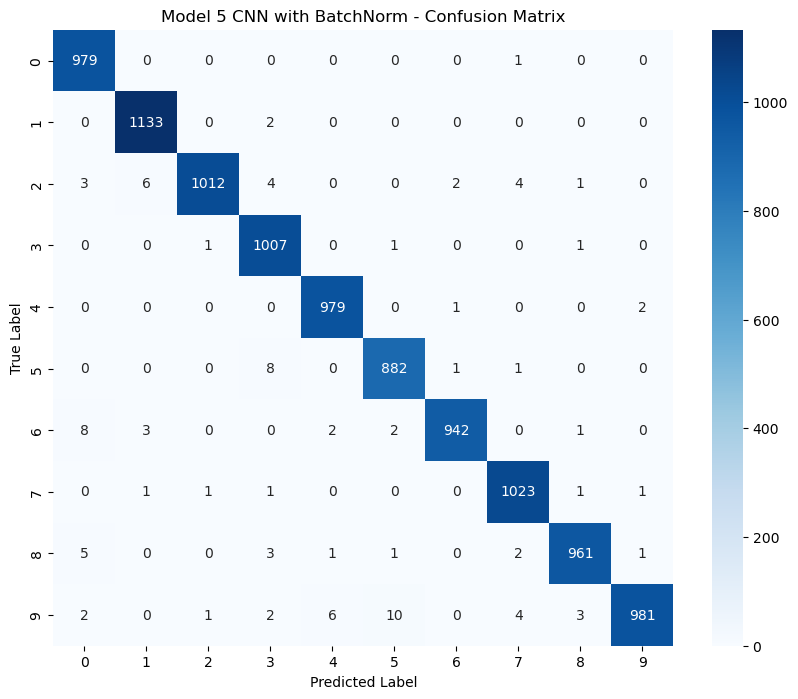


Per-Class Metrics:
------------------------------------------------------------
              precision    recall  f1-score   support

     Digit 0       0.98      1.00      0.99       980
     Digit 1       0.99      1.00      0.99      1135
     Digit 2       1.00      0.98      0.99      1032
     Digit 3       0.98      1.00      0.99      1010
     Digit 4       0.99      1.00      0.99       982
     Digit 5       0.98      0.99      0.99       892
     Digit 6       1.00      0.98      0.99       958
     Digit 7       0.99      1.00      0.99      1028
     Digit 8       0.99      0.99      0.99       974
     Digit 9       1.00      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [54]:
evaluate_model(model5, x_test, y_test, model_name="Model 5 CNN with BatchNorm")